___

___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Get the Data

**We will use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans= pd.read_csv('loan_data.csv')

In [3]:
loans.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

**We will also Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.


In [6]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## Distplot to see the distribution of continuous variables

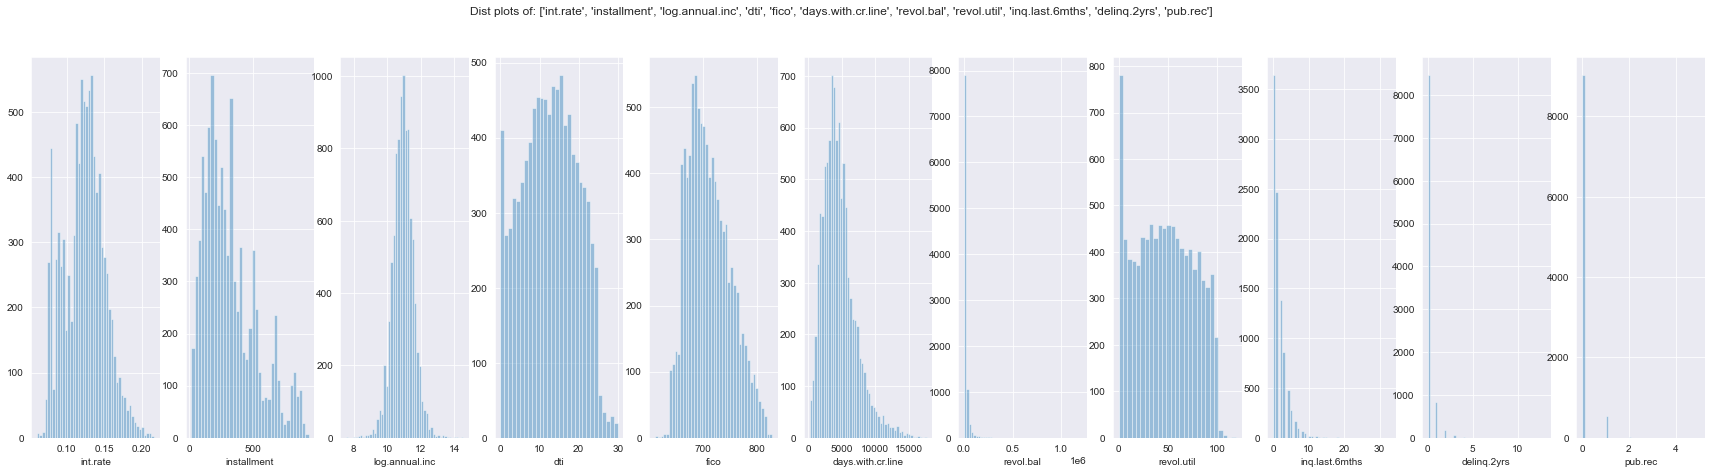

In [15]:
colsToPlot=['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,7))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=loans[i],ax=subPlot[feature],kde=False)

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'Pclass', 'Sex', 'SibSp','Parch','Embarked'

We use bar charts to see how the data is distributed for these categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

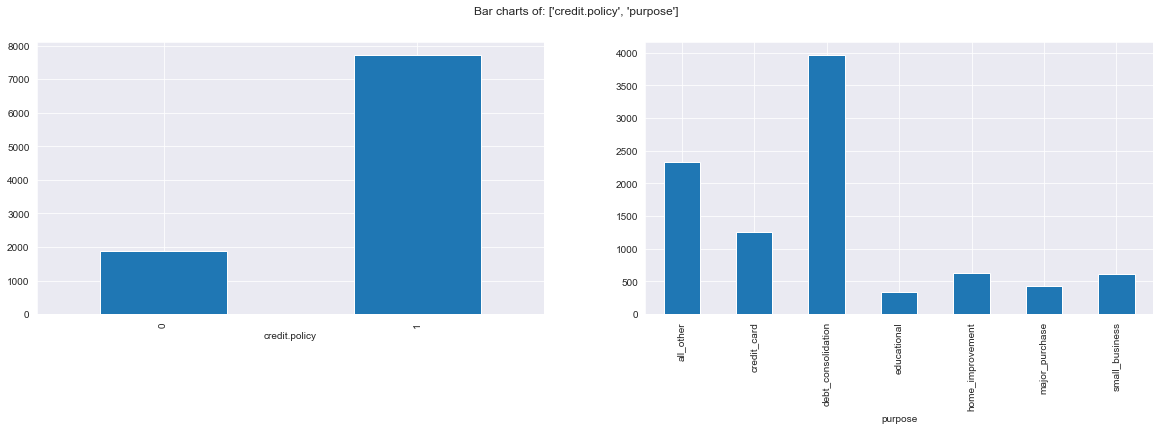

In [17]:
# Calling the function
PlotBarCharts(inpData=loans, colsToPlot=['credit.policy', 'purpose'])

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5, 0, 'FICO')

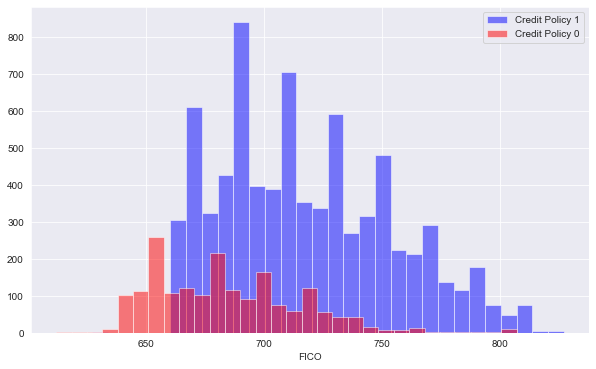

In [4]:
plt.figure(figsize=(10,6))
#loans['fico'].hist(bins=30)
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30, color='blue',label='Credit Policy 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30, color='red',label='Credit Policy 0')
plt.legend()
plt.xlabel('FICO')

**Creating a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

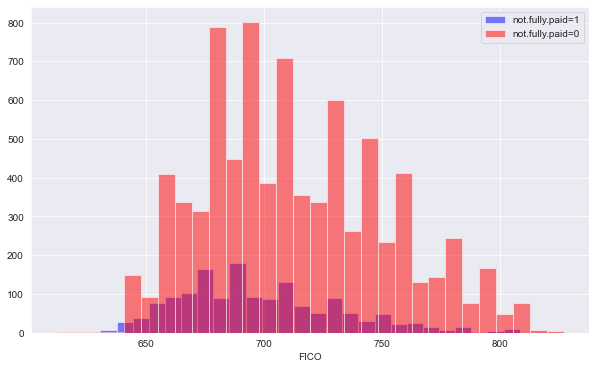

In [5]:
plt.figure(figsize=(10,6))
#loans['fico'].hist(bins=30)
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30, color='blue',label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30, color='red',label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

In [7]:
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='count'>

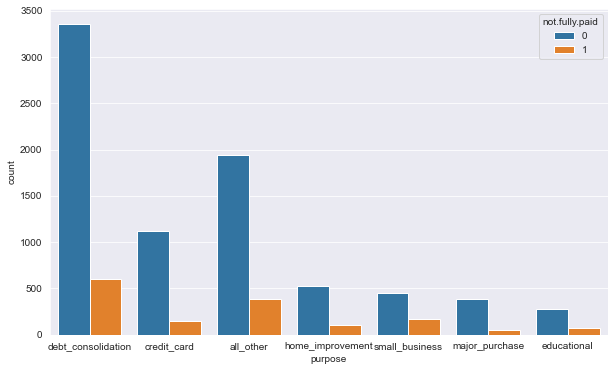

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

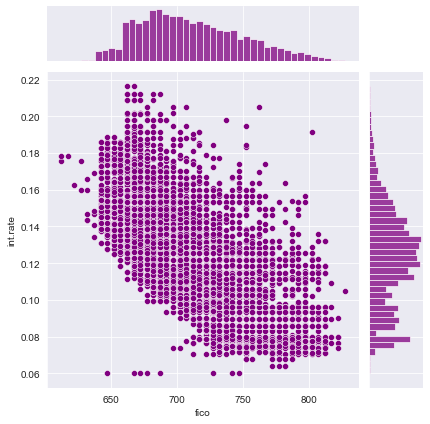

In [13]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

As the interest rate rises the FICO score tend to fall, there is an inverse relstionship between FICO score and interest rate.

**We will create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

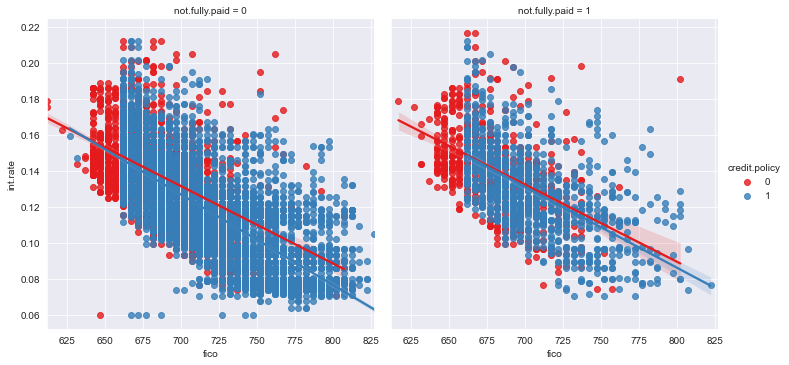

In [15]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

The trend seems same for both the categories of not.fully.paid.

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

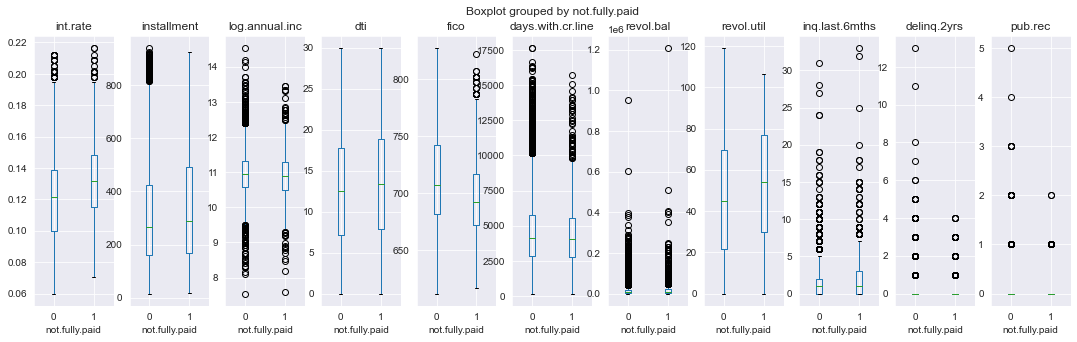

In [21]:
# Box plots for Categorical Target Variable "not.fully.paid" and continuous predictors
ContinuousColsList=['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    loans.boxplot(column=PredictorCol, by='not.fully.paid', figsize=(10,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of not.fully.paid. It hints that these variables might be correlated with not.fully.paid.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [23]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

FunctionAnova(inpData=loans, TargetVariable='not.fully.paid', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

int.rate is correlated with not.fully.paid | P-Value: 1.2205604779803286e-55
installment is correlated with not.fully.paid | P-Value: 1.0012609650408298e-06
log.annual.inc is correlated with not.fully.paid | P-Value: 0.0010637173827531432
dti is correlated with not.fully.paid | P-Value: 0.0002549163767584894
fico is correlated with not.fully.paid | P-Value: 4.227100096624166e-49
days.with.cr.line is correlated with not.fully.paid | P-Value: 0.004215735540137309
revol.bal is correlated with not.fully.paid | P-Value: 1.4522130187420675e-07
revol.util is correlated with not.fully.paid | P-Value: 8.537810348218273e-16
inq.last.6mths is correlated with not.fully.paid | P-Value: 5.794797217571153e-49
delinq.2yrs is NOT correlated with not.fully.paid | P-Value: 0.3848105863718543
pub.rec is correlated with not.fully.paid | P-Value: 1.917765738255667e-06


['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'pub.rec']

The results of ANOVA confirm our visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'pub.rec'

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [30]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [31]:
CategoricalVariables=['credit.policy', 'purpose']

# Calling the function
FunctionChisq(inpData=loans, 
              TargetVariable='not.fully.paid',
              CategoricalVariablesList= CategoricalVariables)

credit.policy is correlated with not.fully.paid | P-Value: 8.87573133930704e-54
purpose is correlated with not.fully.paid | P-Value: 1.0672453117980497e-18


['credit.policy', 'purpose']

<b>Finally selected Categorical variables:</b>

'credit.policy', 'purpose'

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [33]:
SelectedColumns=['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'pub.rec','credit.policy', 'purpose']

# Selecting final columns
DataForML=loans[SelectedColumns]
DataForML.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec,credit.policy,purpose
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,1,debt_consolidation
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,1,credit_card
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,1,debt_consolidation
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,1,debt_consolidation
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,1,credit_card


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

## Converting the nominal variable to numeric using get_dummies()

In [35]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['not.fully.paid']=loans['not.fully.paid']

# Printing sample rows
DataForML_Numeric.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec,credit.policy,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,1,0,0,1,0,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,1,0,1,0,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,1,0,0,1,0,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,1,0,0,1,0,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,1,0,1,0,0,0,0,0,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [36]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'pub.rec', 'credit.policy', 'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'not.fully.paid'],
      dtype='object')

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='not.fully.paid'
Predictors =['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'pub.rec', 'credit.policy', 'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Standardization/Normalization of data

In [39]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Now we will create an instance of DecisionTreeClassifier() called clf and fit it to the training data.**

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

[[2408    0]
 [ 466    0]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76736844 0.76736844 0.76736844 0.76736844 0.76736844 0.76589755
 0.76589755 0.7638211  0.74936312 0.7775397 ]

Final Average Accuracy of the model: 0.77


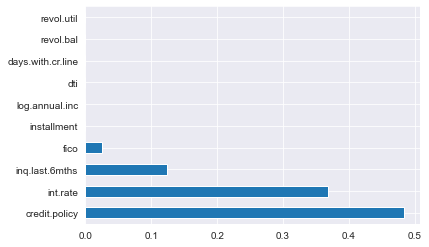

In [40]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
# entropy = 0 -> less randomness, entropy = 1 -> more randomness
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
#clf = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting the Decision Tree

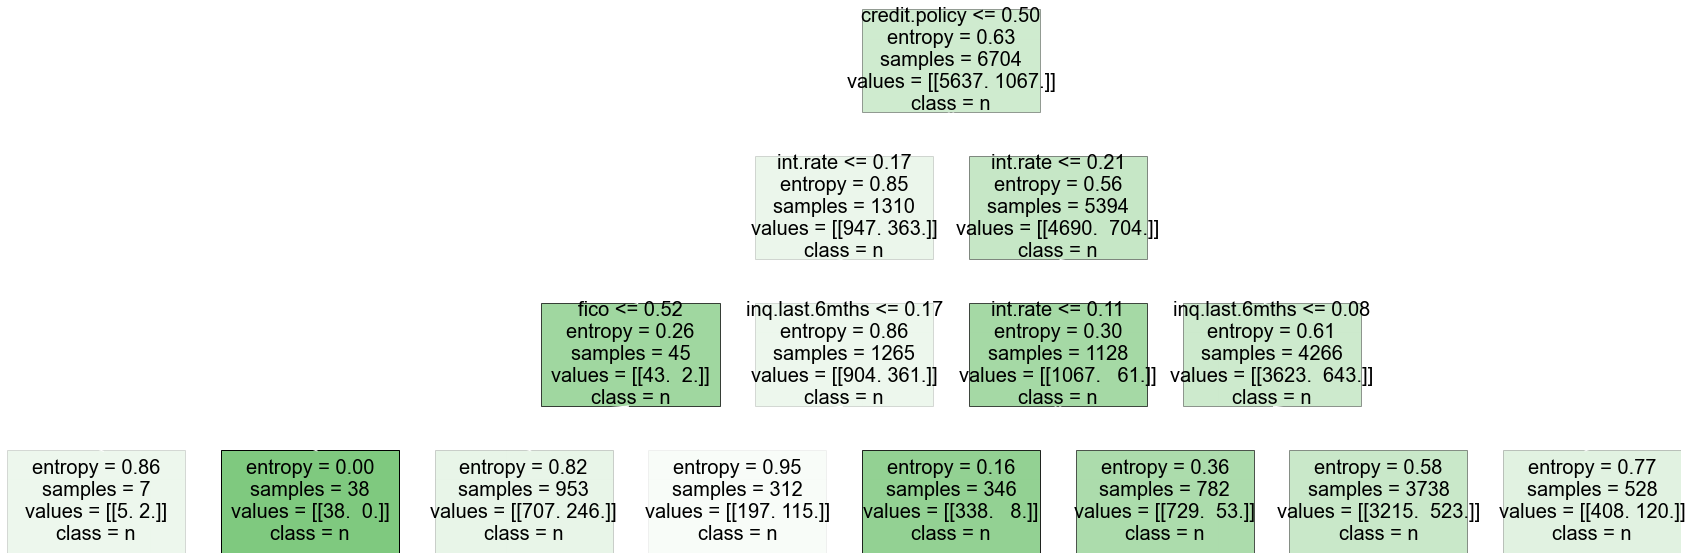

In [41]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



In [45]:
print(confusion_matrix(y_test,prediction))

[[2408    0]
 [ 466    0]]


## Tree Visualization

In [51]:
#!pip install six
!pip install pydot_ng

In [78]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot_ng as pydot

features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Sreya Basak\\anaconda3\\Library\\bin\\graphviz'

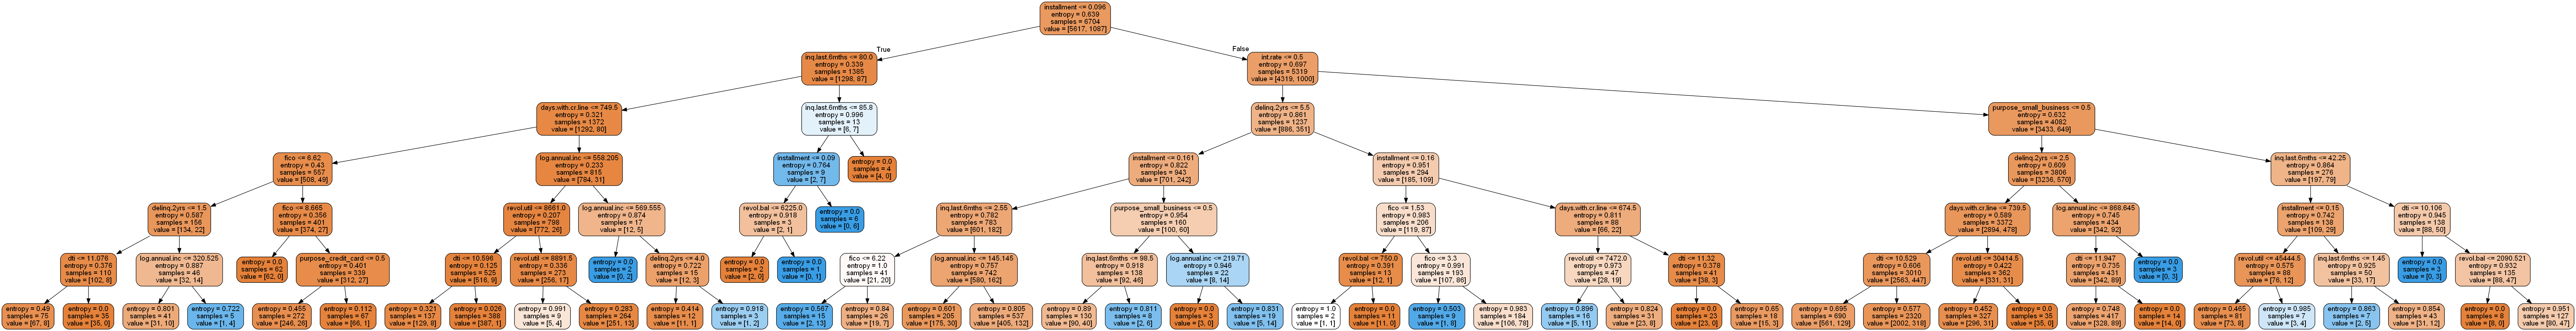

In [79]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=600)
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

[[2408    0]
 [ 466    0]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76736844 0.76736844 0.76736844 0.76736844 0.76736844 0.76589755
 0.76589755 0.76589755 0.74952139 0.77905412]

Final Average Accuracy of the model: 0.77


<AxesSubplot:>

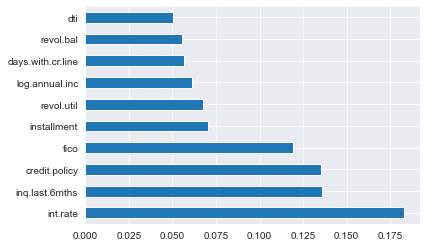

In [54]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators=600,criterion='entropy')

# Printing all the parameters of Random Forest
print(rfc)

# Creating the model on Training Data
RF=rfc.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [53]:
#estimators of Random Forest (Decision Trees)
rfc.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1405764917),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1508158682),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1499579970),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=72587409),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1875905684),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1786437636),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=789251492),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=251633170),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1040832564),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=786079119),
 DecisionTreeClassifi

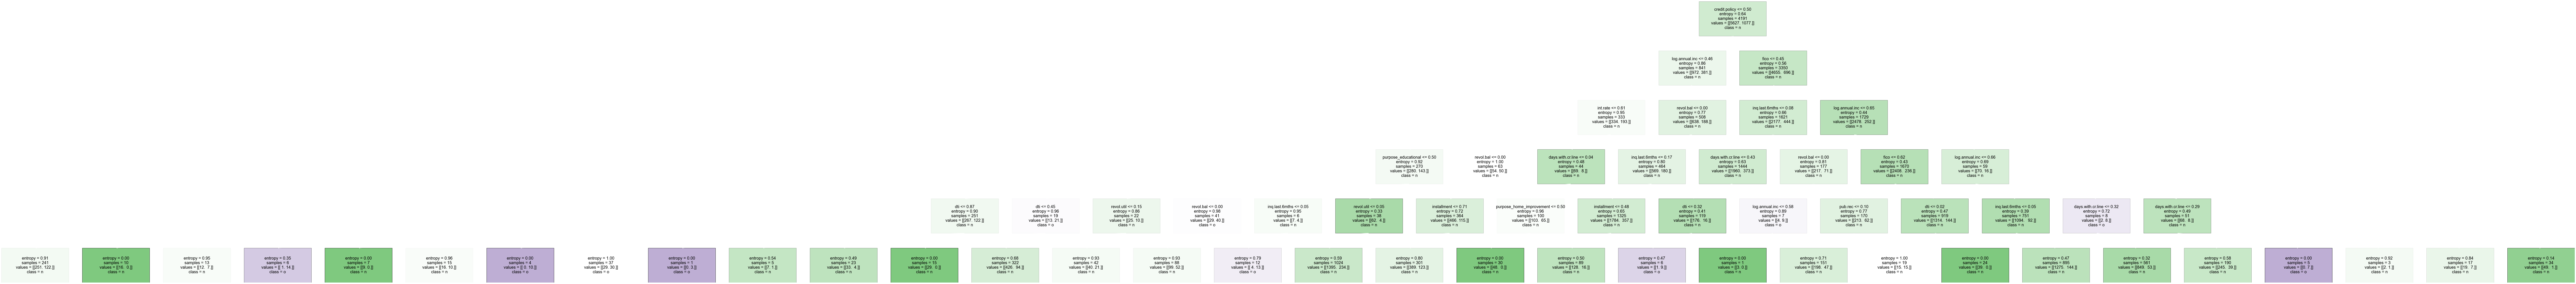

In [55]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=rfc.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


**Now we will create a classification report from the results.**

In [49]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



**Show the Confusion Matrix for the predictions.**

In [50]:
print(confusion_matrix(y_test,prediction))

[[2408    0]
 [ 466    0]]


**What performed better the random forest or the decision tree?**

Both the decision tree and random forest gave us an average accuracy of 77%